In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets

from torch.utils.data import Dataset, DataLoader
# from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sn

import numpy as np
import pandas as pd
import natsort

from datetime import datetime
from matplotlib import pyplot as plt
from tqdm import tqdm
import random
import os

comp_result\comp_120\comp_acc_npy\batch16_epochs200_real_word_acc_0522_074346.npy

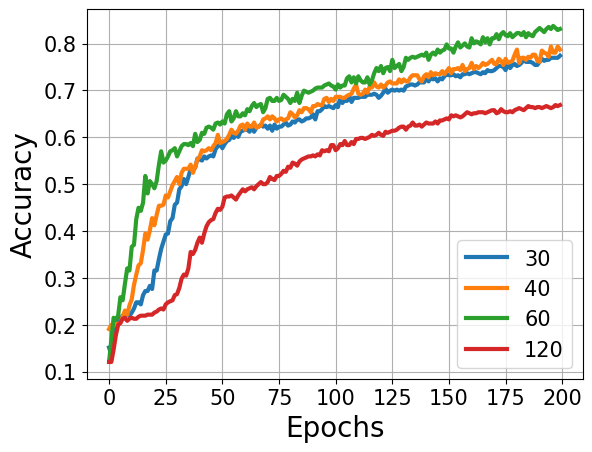

In [14]:
c30_acc = np.load('./comp_result/comp_30/comp_acc_npy/batch16_epochs200_real_word_acc_0522_080032.npy')
c30_loss = np.load('./comp_result/comp_30/comp_loss_npy/batch16_epochs200_real_word_loss_0522_080032.npy')
c30_time = np.load('./comp_result/comp_30/comp_time_npy/batch16_epochs200_real_word_time_0522_080032.npy')

c40_acc = np.load('./comp_result/comp_40/comp_acc_npy/batch16_epochs200_real_word_acc_0522_075725.npy')
c40_loss = np.load('./comp_result/comp_40/comp_loss_npy/batch16_epochs200_real_word_loss_0522_075725.npy')
c40_time = np.load('./comp_result/comp_40/comp_time_npy/batch16_epochs200_real_word_time_0522_075725.npy')

c60_acc = np.load('./comp_result/comp_60/comp_acc_npy/batch16_epochs200_real_word_acc_0522_073828.npy')
c60_loss = np.load('./comp_result/comp_60/comp_loss_npy/batch16_epochs200_real_word_loss_0522_073828.npy')
c60_time = np.load('./comp_result/comp_60/comp_time_npy/batch16_epochs200_real_word_time_0522_073828.npy')

c120_acc = np.load('./comp_result/comp_120/comp_acc_npy/batch16_epochs200_real_word_acc_0522_074346.npy')
c120_loss = np.load('./comp_result/comp_120/comp_loss_npy/batch16_epochs200_real_word_loss_0522_074346.npy')
c120_time = np.load('./comp_result/comp_120/comp_time_npy/batch16_epochs200_real_word_time_0522_074346.npy')


plt.plot(range(len(c30_acc)), c30_acc, label='30', linewidth=3)
plt.plot(range(len(c40_acc)), c40_acc, label='40', linewidth=3)
plt.plot(range(len(c60_acc)), c60_acc, label='60', linewidth=3)
plt.plot(range(len(c120_acc)), c120_acc, label='120', linewidth=3)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.legend(loc='lower right', fontsize=15)

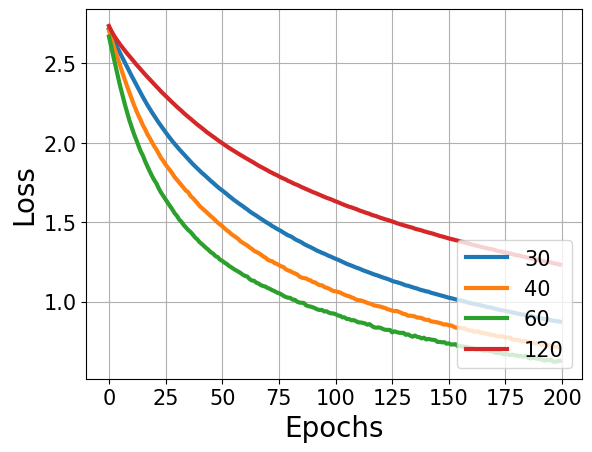

In [5]:
plt.plot(range(len(c30_loss)), c30_loss, label='30', linewidth=3)
plt.plot(range(len(c40_loss)), c40_loss, label='40', linewidth=3)
plt.plot(range(len(c60_loss)), c60_loss, label='60', linewidth=3)
plt.plot(range(len(c120_loss)), c120_loss, label='120', linewidth=3)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.legend(loc='lower right', fontsize=15)

[907.8055098056793, 1000.0697178840637, 1271.5161323547363, 1657.3229866027832]


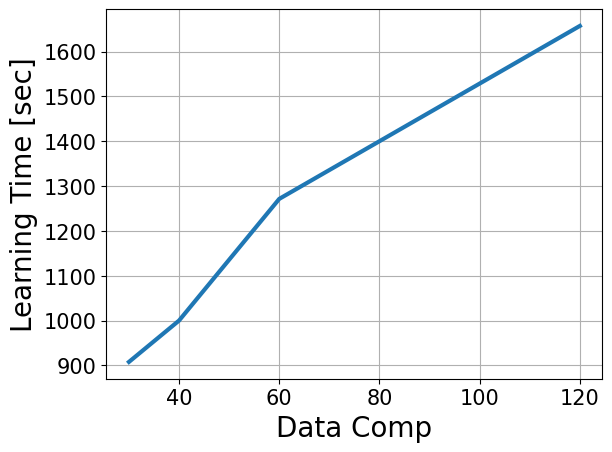

In [12]:
batch_time_lst2 = [c30_time.sum(), c40_time.sum(), c60_time.sum(), c120_time.sum()]
print(batch_time_lst2)
batch_xx = [30, 40, 60, 120]
plt.grid()
plt.plot(batch_xx, batch_time_lst2, linewidth=3)
plt.xlabel('Data Comp', fontsize=20)
plt.ylabel('Learning Time [sec]', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

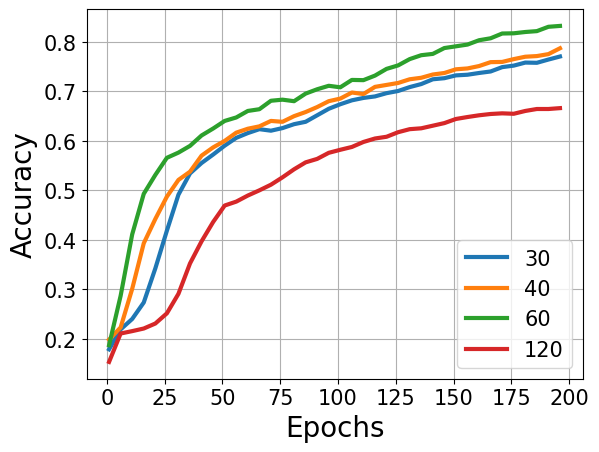

In [13]:
x = np.arange(1,201)
xx = np.arange(1,201,5)

move_avg30 = []
move_avg40 = []
move_avg60 = []
move_avg120 = []

cnt = 1
tmp_sum = 0
for i in c30_acc:
    tmp_sum += i
    if cnt % 5 == 0:
       tmp_avg = tmp_sum / 5
       move_avg30.append(tmp_avg)
       tmp_sum = 0
    cnt += 1
    
cnt = 1
tmp_sum = 0
for i in c40_acc:
    tmp_sum += i
    if cnt % 5 == 0:
       tmp_avg = tmp_sum / 5
       move_avg40.append(tmp_avg)
       tmp_sum = 0
    cnt += 1
    
cnt = 1
tmp_sum = 0
for i in c60_acc:
    tmp_sum += i
    if cnt % 5 == 0:
       tmp_avg = tmp_sum / 5
       move_avg60.append(tmp_avg)
       tmp_sum = 0
    cnt += 1
    
cnt = 1
tmp_sum = 0
for i in c120_acc:
    tmp_sum += i
    if cnt % 5 == 0:
       tmp_avg = tmp_sum / 5
       move_avg120.append(tmp_avg)
       tmp_sum = 0
    cnt += 1

plt.plot(xx, move_avg30, label='30', linewidth=3)
plt.plot(xx, move_avg40, label='40', linewidth=3)
plt.plot(xx, move_avg60, label='60', linewidth=3)
plt.plot(xx, move_avg120, label='120', linewidth=3)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.legend(loc='lower right', fontsize=15)